In [1]:
import numpy as np
import matplotlib.pyplot as plt

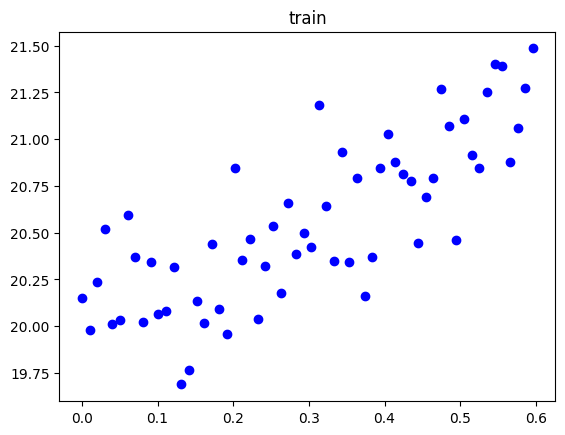

In [2]:
DatasetTrain = np.genfromtxt("lab_1_train.csv", delimiter = ",", skip_header = True)
xData, yData = list(DatasetTrain[:, 1]), list(DatasetTrain[:, 2])
plt.title("train")
plt.plot(xData, yData, "bo")

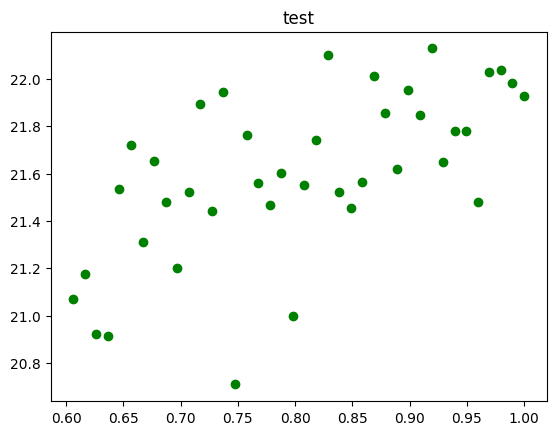

In [3]:
DatasetTest = np.genfromtxt("lab_1_test.csv", delimiter = ",", skip_header = 1)
xData, yData = list(DatasetTest[:, 1]), list(DatasetTest[:, 2])
plt.title("test")
plt.plot(xData, yData, "go")

In [4]:
tol = 0.000001
LearnRate = 0.007
EpochNum = 0
delta = 100
b0 = np.random.randn(1)
b1 = np.random.randn(1)
xCol = DatasetTrain[:, 1]
yCol = DatasetTrain[:, 2]
yPred = [(b0 + np.multiply(b1, x)) for x in xCol]
loss = sum((yPred[i] - yCol[i]) ** 2 for i in range(len(yPred))) / len(yPred)
while tol < delta:
    yPred = [(b0 + np.multiply(b1, x)) for x in xCol]
    yDiff = [(exp - pred) for (exp, pred) in zip(yCol, yPred)]
    b0Der = - (2 / len(yDiff)) * np.sum(yDiff)
    summ = np.dot(xCol, yDiff)
    b1Der = - (2 / len(yDiff)) * summ
    b0 = b0 - LearnRate * b0Der
    b1 = b1 - LearnRate * b1Der
    yPred = [(b0 + np.multiply(b1, x)) for x in xCol]
    LossCurr = sum((yPred[i] - yCol[i]) ** 2 for i in range(len(yPred))) / len(yPred)
    delta = loss - LossCurr
    loss = LossCurr
    if (EpochNum % 50 == 0):
        print(f"epoch #{EpochNum}: beta 0 = {b0[0]} | beta 1 = {b1[0]} | mse loss = {LossCurr[0]}")
    EpochNum += 1

epoch #0: beta 0 = -0.6913439898928206 | beta 1 = -1.0593822340206052 | mse loss = 465.0417067956306
epoch #50: beta 0 = 9.919084966953605 | beta 1 = 2.129504234310651 | mse loss = 99.99232642483864
epoch #100: beta 0 = 14.841903435279345 | beta 1 = 3.57595070598021 | mse loss = 21.700175581046484
epoch #150: beta 0 = 17.130691804774866 | beta 1 = 4.21608722259126 | mse loss = 4.902883980155667
epoch #200: beta 0 = 18.1995222172545 | beta 1 = 4.483410537865805 | mse loss = 1.293345846143474
epoch #250: beta 0 = 18.703234339779865 | beta 1 = 4.578655468187257 | mse loss = 0.5121813158310046
epoch #300: beta 0 = 18.94507826410784 | beta 1 = 4.594768382735574 | mse loss = 0.3378298007257003
epoch #350: beta 0 = 19.065488001483818 | beta 1 = 4.574780603539717 | mse loss = 0.29387125477310466
epoch #400: beta 0 = 19.129499741757645 | beta 1 = 4.538608730536811 | mse loss = 0.27812816229916115
epoch #450: beta 0 = 19.167233978057524 | beta 1 = 4.495465477951289 | mse loss = 0.268679008147563

In [5]:
x_train, y_train = list(DatasetTrain[:, 1]), list(DatasetTrain[:, 2])
x_test, y_test = list(DatasetTest[:, 1]), list(DatasetTest[:, 2])
y_predict = [(b0[0] + np.multiply(b1[0], x)) for x in x_test]
print(f"mse loss value: {sum((y_predict[i] - y_test[i]) ** 2 for i in range(len(y_predict))) / len(y_predict)}")

mse loss value: 0.07711166403048123


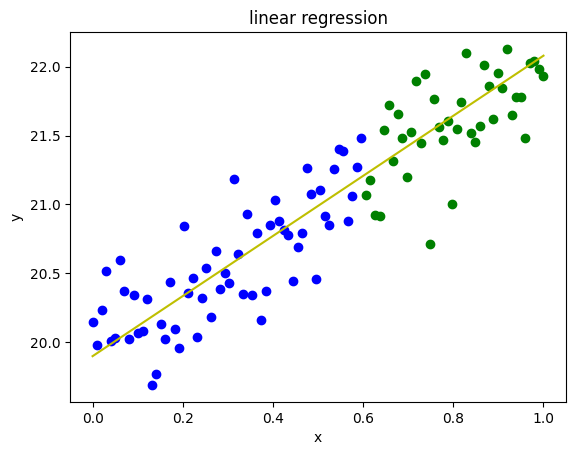

In [6]:
plt.title("linear regression")
plt.xlabel('x') 
plt.ylabel('y') 
plt.plot(x_train, y_train, "bo", x_test, y_test, "go", [0, 1], [(b0[0] + np.multiply(b1[0], 0)), (b0[0] + np.multiply(b1[0], 1))], "y")